# Implementation of Classic Search Algorithm 
## Outline
1. Introduction
2. Data processing and preparation
3. Implementation of Search algorithms
4. Results and comparisons
5. Conclusions and Recommendations <br/>
6. References

## 1. Introduction
In this report, the uninformed and informed family of search algorithms, namely, breadth-first search (BFS), greedy-best first search (GBFS) and A* (star) search algorithms, will be implemented to solve the navigational search problem in the tourism industry of Australia.

### 2. Data processing and preparation

In [ ]:
# import numpy for numeric operations, pandas for read csv and data processing, import matplotlib for visualisation
import numpy as np
import pandas as pd
import matplotlib as plt

In [ ]:
# Top tourist destinations adapted from https://www.ytravelblog.com/places-in-australia-bucket-list/
df_coordinates = pd.read_csv("/data/data_coordinates.csv")

The Top 20 tourist destinations in Australia adapted from the Ytravel Blog. Then each coordinates LocationX and LocationY are collected using Google Maps. The first five rows of the `df_coordinates` data frame shown below.

In [ ]:
df_coordinates.head()

,LocationNameFull,LocationName,LocationX,LocationY
0,"Whitsunday Islands, Queensland",Whitsunday,149.0,-20.2
1,"Kakadu National Park, Northern Territory",Kakadu,132.5,-11.1
2,"Margaret River, Western Australia",MargaretRiver,113.9,-27.8
3,"Sydney, New South Wales",Sydney,151.3,-32.2
4,"Broome, Western Australia",Broome,122.3,-16.1


The following function `define_map` adapted from Lab 3 in order to calculate the distance between tourist destinations.
The distance is based on degree of latitude and longitude, so converted the distance into km multiplying by 111.
One degree of latitude, called an arc degree, covers about 111 kilometers. (National Geographic Society) https://education.nationalgeographic.org/resource/latitude/

In [ ]:
def define_map(city_location):
    global distances
    city_locations = city_location
    all_cities = []
    distances = {}

    for city in city_locations.keys():
        distances[city] = {}
        all_cities.append(city)
    all_cities.sort()

    for name_1, coordinates_1 in city_locations.items():
            for name_2, coordinates_2 in city_locations.items():
                distances[name_1][name_2] = round(np.linalg.norm(
                    [coordinates_1[0] - coordinates_2[0], coordinates_1[1] - coordinates_2[1]]) * 111)
                distances[name_2][name_1] = distances[name_1][name_2]

    return (all_cities, distances)

In [ ]:
# Create a dictionary called `locations` using LocationName and coordinates to use it in the `define_map` function
locations = {}
for x1,x2 in zip(df_coordinates["LocationName"],zip(df_coordinates["LocationX"],df_coordinates["LocationY"])):
    locations[x1] = x2

In [ ]:
# Check locations dictionary
locations

{'Whitsunday': (149.0, -20.2),
 'Kakadu': (132.5, -11.1),
 'MargaretRiver': (113.9, -27.8),
 'Sydney': (151.3, -32.2),
 'Broome': (122.3, -16.1),
 'FreycinetPark': (150.5, -38.8),
 'Uluru': (131.0, -25.3),
 'Daintree': (145.4, -16.2),
 'FraserIsland': (153.4, -25.0),
 'Melbourne': (145.1, -37.9),
 'Perth': (116.0, -25.3),
 'Hobart': (147.3, -42.8),
 'Adelaide': (139.3, -33.0),
 'KarijiniPark': (118.3, -22.7),
 'GoldCoast': (153.4, -28.0),
 'KangarooIsland': (137.2, -35.8)}

In [ ]:
# get destination names and distances
all_cities, distances = define_map(locations)

In [ ]:
# print distances. It shows the distance between each tourist destinations in km.
print(distances)

{'Whitsunday': {'Whitsunday': 0, 'Kakadu': 2092, 'MargaretRiver': 3986, 'Sydney': 1356, 'Broome': 2998, 'FreycinetPark': 2071, 'Uluru': 2077, 'Daintree': 597, 'FraserIsland': 723, 'Melbourne': 2012, 'Perth': 3706, 'Hobart': 2516, 'Adelaide': 1783, 'KarijiniPark': 3419, 'GoldCoast': 994, 'KangarooIsland': 2171}, 'Kakadu': {'Whitsunday': 2092, 'Kakadu': 0, 'MargaretRiver': 2775, 'Sydney': 3137, 'Broome': 1261, 'FreycinetPark': 3667, 'Uluru': 1585, 'Daintree': 1540, 'FraserIsland': 2786, 'Melbourne': 3287, 'Perth': 2416, 'Hobart': 3883, 'Adelaide': 2545, 'KarijiniPark': 2035, 'GoldCoast': 2983, 'KangarooIsland': 2791}, 'MargaretRiver': {'Whitsunday': 3986, 'Kakadu': 2775, 'MargaretRiver': 0, 'Sydney': 4180, 'Broome': 1599, 'FreycinetPark': 4242, 'Uluru': 1918, 'Daintree': 3726, 'FraserIsland': 4396, 'Melbourne': 3640, 'Perth': 362, 'Hobart': 4064, 'Adelaide': 2878, 'KarijiniPark': 748, 'GoldCoast': 4385, 'KangarooIsland': 2735}, 'Sydney': {'Whitsunday': 1356, 'Kakadu': 3137, 'MargaretRive

In [ ]:
# Convert distances dictionary to data frame and print top 5 rows
correlation = pd.DataFrame(distances)

In [ ]:
correlation.head(10)

,Whitsunday,Kakadu,MargaretRiver,Sydney,Broome,FreycinetPark,Uluru,Daintree,FraserIsland,Melbourne,Perth,Hobart,Adelaide,KarijiniPark,GoldCoast,KangarooIsland
Whitsunday,0,2092,3986,1356,2998,2071,2077,597,723,2012,3706,2516,1783,3419,994,2171
Kakadu,2092,0,2775,3137,1261,3667,1585,1540,2786,3287,2416,3883,2545,2035,2983,2791
MargaretRiver,3986,2775,0,4180,1599,4242,1918,3726,4396,3640,362,4064,2878,748,4385,2735
Sydney,1356,3137,4180,0,3682,738,2380,1893,833,935,3992,1258,1335,3812,521,1615
Broome,2998,1261,1599,3682,0,4018,1405,2564,3591,3501,1238,4060,2661,857,3696,2742
FreycinetPark,2071,3667,4242,738,4018,0,2633,2572,1565,608,4112,569,1400,3996,1241,1513
Uluru,2077,1585,1918,2380,1405,2633,0,1891,2487,2099,1665,2655,1257,1439,2504,1354
Daintree,597,1540,3726,1893,2564,2572,1891,0,1320,2409,3416,2960,1984,3093,1582,2358
FraserIsland,723,2786,4396,833,3591,1565,2487,1320,0,1703,4152,2089,1799,3904,333,2161
Melbourne,2012,3287,3640,935,3501,608,2099,2409,1703,0,3520,596,843,3420,1434,907


To perform the navigational search problem, need to find neighbouring locations of each node (destinations) that are connected. Thus, exported the correlation data frame, removed the unnecessary edges and created a new dataset called `destinations_correlation_matrix.csv`.

In [ ]:
# Export correlation df to `correlation_raw.csv`
correlation.to_csv('correlation_raw.csv')

In [ ]:
# Read destinations_correlation_matrix.csv file to df_matrix
df_matrix = pd.read_csv("/content/42172-Assignments/AT1_Example1/data/destinations_correlation_matrix.csv")

In [ ]:
df_matrix

,LocationName,Whitsunday,Kakadu,MargaretRiver,Sydney,Broome,FreycinetPark,Uluru,Daintree,FraserIsland,Melbourne,Perth,Hobart,Adelaide,KarijiniPark,GoldCoast,KangarooIsland
0,Whitsunday,0,0,0,0,0,0,0,599,722,0,0,0,0,0,0,0
1,Kakadu,0,0,0,0,1259,0,1585,1540,0,0,0,0,0,0,0,0
2,MargaretRiver,0,0,0,0,0,0,0,0,0,0,359,0,0,0,0,0
3,Sydney,0,0,0,0,0,867,2373,0,0,938,0,0,1338,0,521,0
4,Broome,0,1259,0,0,0,0,1408,0,0,0,0,0,0,851,0,0
5,FreycinetPark,0,0,0,867,0,0,0,0,0,532,0,413,0,0,0,0
6,Uluru,0,1585,0,2373,1408,0,0,0,0,0,1672,0,1246,0,2505,0
7,Daintree,599,1540,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,FraserIsland,722,0,0,0,0,0,0,0,0,0,0,0,0,0,337,0
9,Melbourne,0,0,0,938,0,532,0,0,0,0,0,596,851,0,0,0


## 3. Implementation of Search algorithms

### Graph definition

To import the required modules, change the directory to the `modules`.

In [ ]:
cd /modules

Use `ls` command to list the directory files

In [ ]:
ls

BestFirstSearch_for_graph.py  BFS_for_graph.py  graphSource.py
BestFirstSearch.py            BFS.py            utils.py


In [ ]:
# Import graphSource modules
from graphSource import *
import pandas as pd
import matplotlib as plt

In [ ]:
# create cities and city lists
cities = [] # list of all cities
city = [] # list of city holding its name and cooridnates

# get the name of the coordinates
name = df_coordinates["LocationName"]

# define the coordinates
location = (df_coordinates["LocationX"],df_coordinates["LocationY"])

# zip location name with location coordinates
for x1,x2 in zip(df_coordinates["LocationName"],zip(df_coordinates["LocationX"],df_coordinates["LocationY"])):
    # append each coordinates to city and append city to cities
    city.append(x1)
    city.append(x2)
    cities.append(city)
    city=[]

In [ ]:
# print cities list
print ('City data: {}'.format(cities))
print("\n{} cities in total".format(len(cities)))

City data: [['Whitsunday', (149.0, -20.2)], ['Kakadu', (132.5, -11.1)], ['MargaretRiver', (113.9, -27.8)], ['Sydney', (151.3, -32.2)], ['Broome', (122.3, -16.1)], ['FreycinetPark', (150.5, -38.8)], ['Uluru', (131.0, -25.3)], ['Daintree', (145.4, -16.2)], ['FraserIsland', (153.4, -25.0)], ['Melbourne', (145.1, -37.9)], ['Perth', (116.0, -25.3)], ['Hobart', (147.3, -42.8)], ['Adelaide', (139.3, -33.0)], ['KarijiniPark', (118.3, -22.7)], ['GoldCoast', (153.4, -28.0)], ['KangarooIsland', (137.2, -35.8)]]

16 cities in total


In [ ]:
# create neighbours and relationships
neighbours = [] # list of neighbours
relations = [] # list of all relations
relation = [] # list of relation

for i in range (df_matrix.shape[0]):
    x = df_matrix.iloc[i,:]
    relationKey=(x[0])
    for j in range (1,df_matrix.shape[1]):
        if (j>i and x[j] != 0 ):
            relation.append([df_matrix.columns[j],x[j]])
    if (len(relation) != 0):
        relations = [relationKey, relation]
        neighbours.append(relations)

    relation =[] # single relation list
    relations=[] # all relations list

In [ ]:
# Print neighbouring data of each location
print ('Tourist locations neighbours data: {}'.format(neighbours))
print("\n{} elements in the list".format(len(neighbours)))

Tourist locations neighbours data: [['Whitsunday', [['Daintree', 599], ['FraserIsland', 722]]], ['Kakadu', [['Broome', 1259], ['Uluru', 1585], ['Daintree', 1540]]], ['MargaretRiver', [['Perth', 359]]], ['Sydney', [['FreycinetPark', 867], ['Uluru', 2373], ['Melbourne', 938], ['Adelaide', 1338], ['GoldCoast', 521]]], ['Broome', [['Uluru', 1408], ['KarijiniPark', 851]]], ['FreycinetPark', [['Melbourne', 532], ['Hobart', 413]]], ['Uluru', [['Perth', 1672], ['Adelaide', 1246], ['GoldCoast', 2505]]], ['FraserIsland', [['GoldCoast', 337]]], ['Melbourne', [['Hobart', 596], ['Adelaide', 851]]], ['Perth', [['Adelaide', 2724], ['KarijiniPark', 386]]], ['Adelaide', [['KangarooIsland', 386]]]]

11 elements in the list


In [ ]:
# Use define_graph method to create graph data and graph
tourism_graph_data, tourism_graph = define_graph(neighbours, cities)

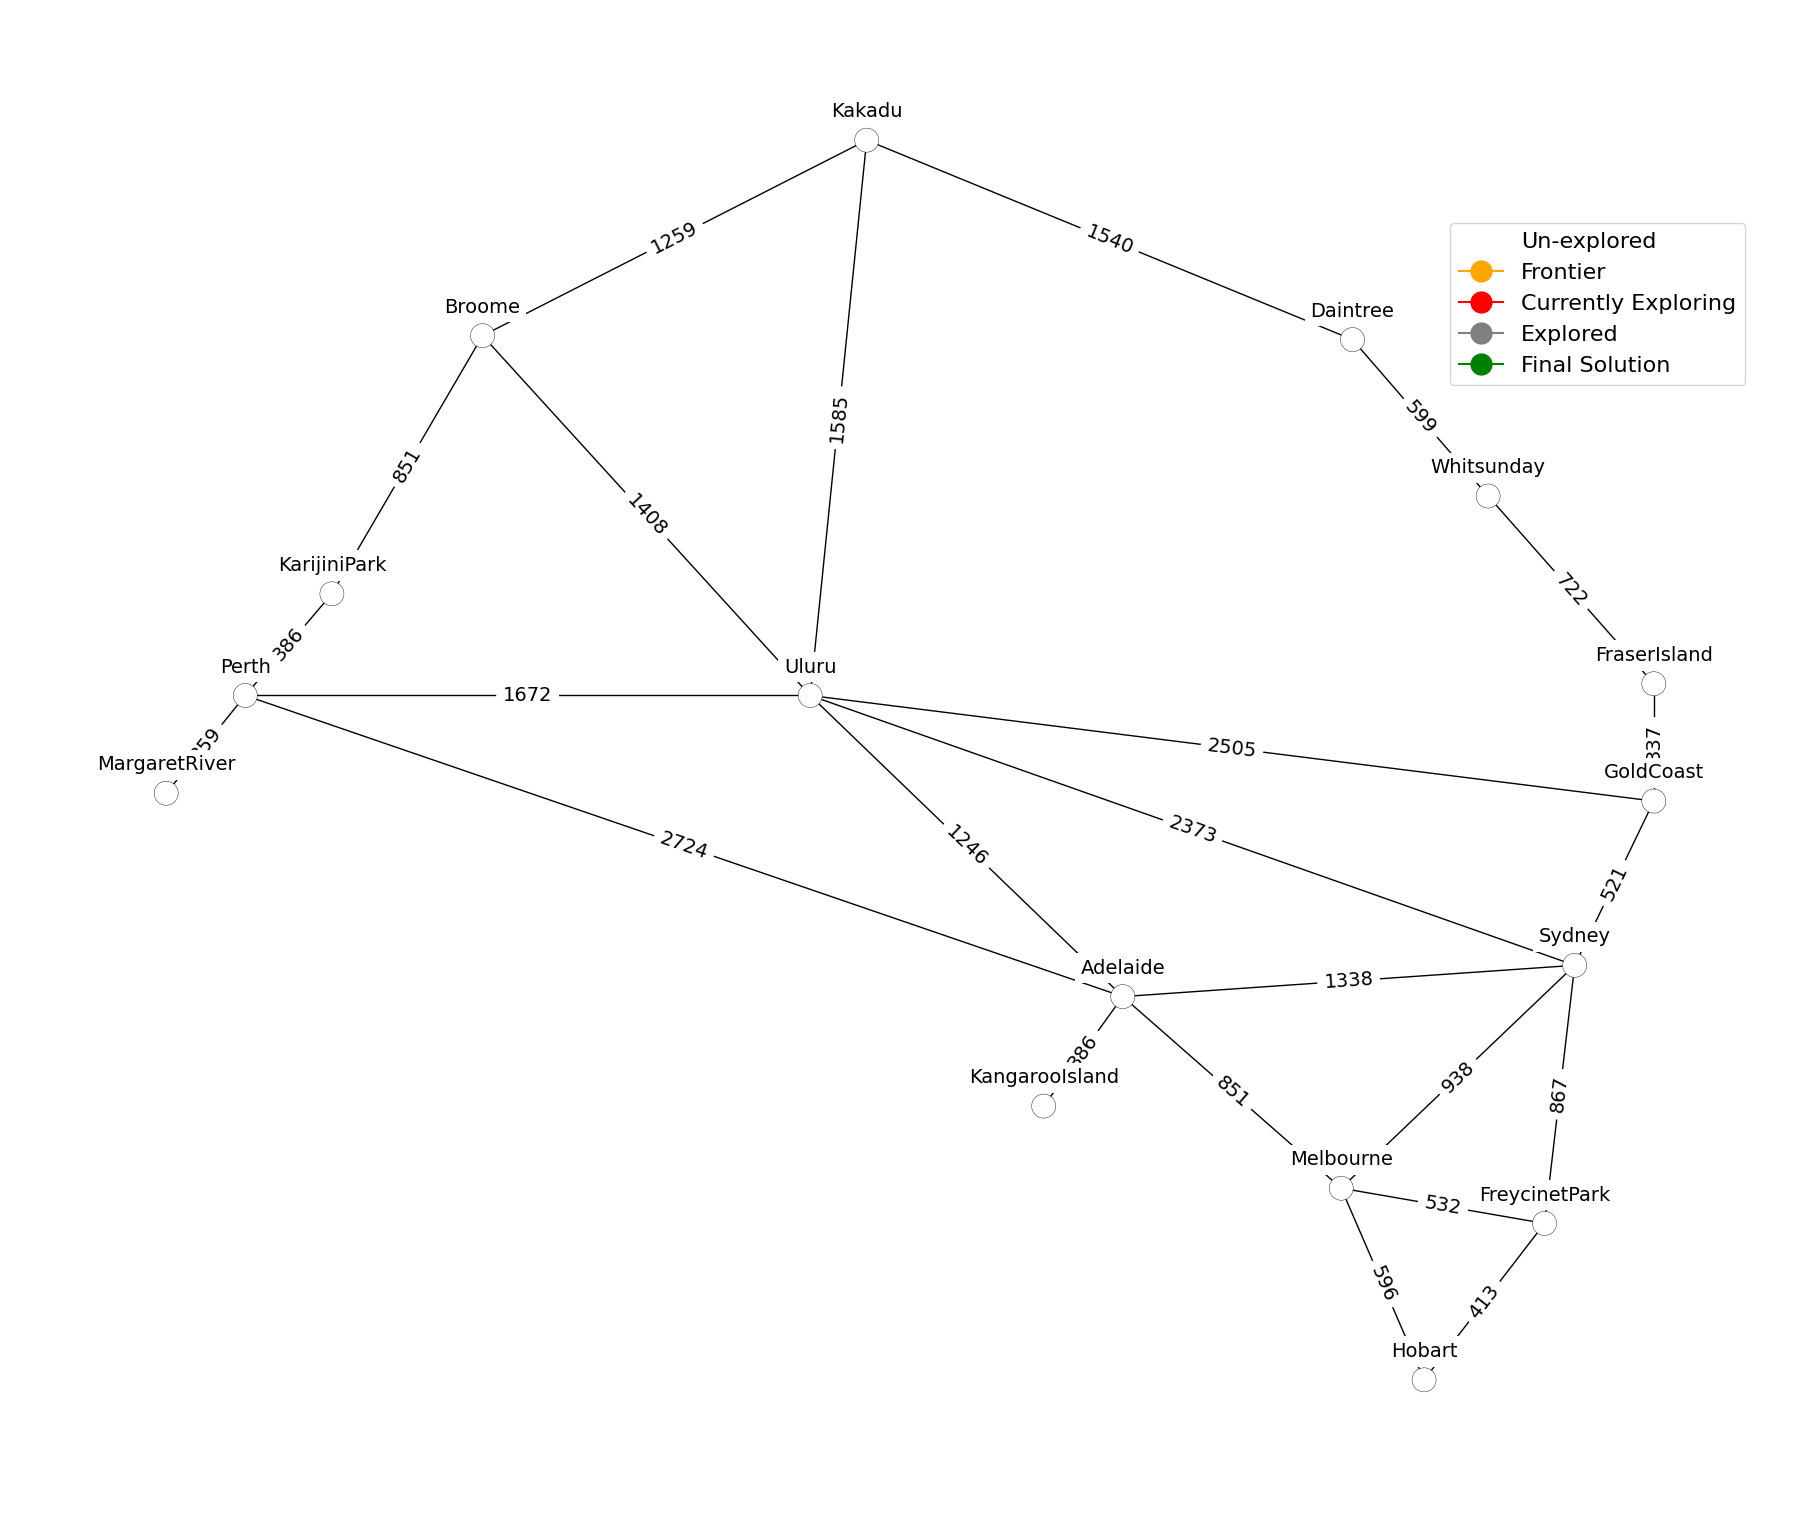

In [ ]:
# Display the state space graph
show_graph(tourism_graph_data)

In [ ]:
# Define a search problem, with a start city -- FreycinetPark and a goal city -- Kakadu
tourism_problem = GraphProblem('FreycinetPark','Kakadu',tourism_graph)

In [ ]:
# Print actions at state FreycinetPark
print(tourism_problem.actions('FreycinetPark'))

['Melbourne', 'Hobart', 'Sydney']


#### Uninformed (Blind) search

In [ ]:
# Import breadth-first search modules
from BFS import *
# Define BFS tree algorithm
BFS_tree = BFS_tree_algorithm()

# Breadth-first search for graph visualisation
from BFS_for_graph import *
# BFS algorithm with visual display
BFS_tree_for_graph = BFS_tree_algorithm_for_graph()

#### Informed (Heuristic) search

In [ ]:
# Best-first search
from BestFirstSearch import *

# Define GFBS and AStar search algorithms
GBFS = GBFS_algorithm()
AStar = AStar_algorithm()

# Best-first search for graph visualisation
from BestFirstSearch_for_graph import *

# GBFS and Astar algorithm with visual display
GBFS_for_graph = GBFS_algorithm_for_graph()
AStar_for_graph = AStar_algorithm_for_graph()

## 4. Result and comparisions

In [ ]:
# display result for breadth-first search tree
display_result(tourism_problem, BFS_tree())

Algorithm: BFS_tree
 Iteration times : 254  Path : [<Node FreycinetPark>, <Node Sydney>, <Node Uluru>, <Node Kakadu>]


In [ ]:
# display result for greedy best-first search
display_result(tourism_problem, GBFS())

Algorithm: GBFS
 Iteration times : 19  Path : [<Node FreycinetPark>, <Node Sydney>, <Node Uluru>, <Node Kakadu>]


In [ ]:
# display result for A star search
display_result(tourism_problem, AStar())

Algorithm: AStar
 Iteration times : 47  Path : [<Node FreycinetPark>, <Node Melbourne>, <Node Adelaide>, <Node Uluru>, <Node Kakadu>]


#### Animated graph

In [ ]:
# display result for breadth-first search
display_result_for_graph(tourism_problem, BFS_tree_for_graph(), tourism_graph_data)

Algorithm: BFS_tree_for_graph


interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='Visualize'), Output()), _dom_classes=('widget-int…

In [ ]:
# display result for greedy best-first search
display_result_for_graph(tourism_problem, GBFS_for_graph(), tourism_graph_data)

Algorithm: GBFS_for_graph


interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='Visualize'), Output()), _dom_classes=('widget-int…

In [ ]:
# display result for A star search
display_result_for_graph(tourism_problem, AStar_for_graph(), tourism_graph_data)

Algorithm: AStar_for_graph


interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='Visualize'), Output()), _dom_classes=('widget-int…

## 5. Conclusion and Recommendations

The results show that the greedy best-first performs best regarding iteration times, followed by A star and breadth-first search. The solution path is identical for the best-first and greedy best-first search. In addition, considering the optimality, the A star search performed better compared to other algorithms.

The choice of search algorithm depends on what kind of problem we trying to solve. When the action costs are identical or an unweighted small graph, the breadth-first search is a suitable solution for that problem.  

When the task requires memory and is time efficient, the greedy best-first search could solve the problem. A star search can be used for a complex graph to find an optimal solution. But need to consider choosing the correct heuristic design and memory issue. The proper heuristic function is crucial for greedy best-first and A star search. In future work, implementing and testing the extended versions of algorithms, such as Weighted A*, Bidirectional A*, and beam search, could be helpful.


## References

Barr, A., Feigenbaum, E. A., & Cohen, P. R. (1981). The Handbook of artificial intelligence. HeirisTech Press.

Evers, J., Editing, E., & Editing, E. (20 December 2022). Latitude is the measurement of distance north or south of the Equator. National Geographic. https://education.nationalgeographic.org/resource/latitude/

Makepeace, C. (3 October 2022). Top 20 places in Australia for your bucket list. Y Travel. https://www.ytravelblog.com/places-in-australia-bucket-list/

Moore, E. F. (1959). The Shortest Path Through a Maze. United States: Bell Telephone System.

Newell, A., Shaw, J. C., & Simon, H. A. (1958). Elements of a theory of human problem-solving. Psychological Review, 65(3), 151–166. https://doi.org/10.1037/h0048495

Hart, P., Nilsson, N., & Raphael, B. (1968). A Formal Basis for the Heuristic Determination of Minimum Cost Paths. IEEE Transactions on Systems Science and Cybernetics, 4(2), 100–107. https://doi.org/10.1109/TSSC.1968.300136

Russell, S., & Norvig, P. (2021). Artificial intelligence: A modern approach, global edition. Pearson Education, Limited.
